<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B5%B0%EC%A7%91%ED%99%94_%EC%8B%A4%EC%8A%B5(%EA%B3%A0%EA%B0%9D_%EB%B6%84%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/pymlrev2/

In [1]:
path = '/content/drive/MyDrive/mldata/Online Retail.xlsx'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(path)
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df['InvoiceNo'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: InvoiceNo
Non-Null Count   Dtype 
--------------   ----- 
541909 non-null  object
dtypes: object(1)
memory usage: 4.1+ MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [11]:
df[df['Quantity']<=0]['InvoiceNo']

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 10624, dtype: object

In [12]:
fil = df['Country']=='United Kingdom'
df= df[fil]
df['Country'].value_counts()

United Kingdom    495478
Name: Country, dtype: int64

In [13]:
df['sale_amount'] = df['Quantity'] * df['UnitPrice']

In [17]:
df['CustomerID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 495478 entries, 0 to 541893
Series name: CustomerID
Non-Null Count   Dtype  
--------------   -----  
361878 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [18]:
df['CustomerID'].describe()

count    361878.000000
mean      15547.871368
std        1594.402590
min       12346.000000
25%       14194.000000
50%       15514.000000
75%       16931.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [27]:
exlist = []
for i,cid in enumerate(df['CustomerID']):
  try:
    c = int(cid)
  except:
    exlist.append([i,cid])

In [28]:
len(exlist)

133600

In [31]:
type(exlist[0][1])

float

In [34]:
import math
math.isnan(exlist[0][1])

True

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
 8   sale_amount  495478 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 53.9+ MB


In [36]:
fil = df['CustomerID'].notnull()
df = df[fil]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
 8   sale_amount  361878 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.6+ MB


In [37]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 361878 entries, 0 to 541893
Series name: CustomerID
Non-Null Count   Dtype
--------------   -----
361878 non-null  int64
dtypes: int64(1)
memory usage: 5.5 MB


In [38]:
df['CustomerID'].value_counts()

17841    7983
14096    5128
12748    4642
14606    2782
15311    2491
         ... 
15668       1
15657       1
13307       1
16138       1
16765       1
Name: CustomerID, Length: 3950, dtype: int64

In [42]:
css = df.groupby('CustomerID')['sale_amount'].sum()
css.sort_values()[::-1]

CustomerID
18102    256438.49
17450    187482.17
17511     88125.38
16684     65892.08
13694     62653.10
           ...    
15823      -840.76
17603     -1165.30
14213     -1192.20
15369     -1592.49
17448     -4287.63
Name: sale_amount, Length: 3950, dtype: float64

In [43]:
df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.0283604908240456

In [44]:
cdg = df.groupby('CustomerID')

In [46]:
invoice_no = cdg['InvoiceNo'].count()
invoice_date = cdg['InvoiceDate'].max()
sale_amount = cdg['sale_amount'].sum()

In [48]:
cdf = pd.DataFrame()
cdf['Frequency'] = invoice_no
cdf['Recency'] = invoice_date
cdf['Monetary'] = sale_amount
cdf = cdf.reset_index()
cdf.head(3)

,CustomerID,Frequency,Recency,Monetary
0,12346,2,2011-01-18 10:17:00,0.00
1,12747,103,2011-12-07 14:34:00,4196.01
2,12748,4642,2011-12-09 12:20:00,29072.10


In [49]:
import datetime as dt

In [50]:
cdf['Recency'] = dt.datetime(2011,12,10) - cdf['Recency']
cdf['Recency'].head(3)

0   325 days 13:43:00
1     2 days 09:26:00
2     0 days 11:40:00
Name: Recency, dtype: timedelta64[ns]

In [51]:
cdf['Recency'] = cdf['Recency'].apply(lambda x:x.days+1)
cdf['Recency'].head(3)

0    326
1      3
2      1
Name: Recency, dtype: int64

In [52]:
cdf.head(5)

,CustomerID,Frequency,Recency,Monetary
0,12346,2,326,0.00
1,12747,103,3,4196.01
2,12748,4642,1,29072.10
3,12749,231,4,3868.20
4,12820,59,4,942.34


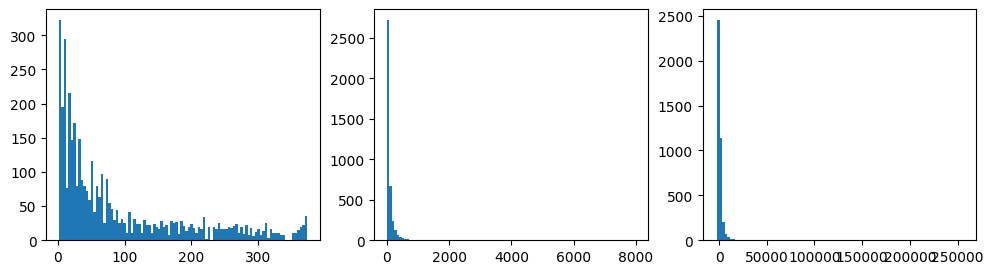

In [57]:
_,axes = plt.subplots(ncols=3,figsize=(12,3))
axes[0].hist(cdf['Recency'],bins=100)
axes[1].hist(cdf['Frequency'],bins=100)
axes[2].hist(cdf['Monetary'],bins=100)
plt.show()

In [58]:
cdf.describe()

,CustomerID,Frequency,Recency,Monetary
count,3950.000000,3950.000000,3950.000000,3950.000000
mean,15562.029367,91.614684,92.323038,1713.385669
std,1576.848325,220.557389,100.236848,6548.608224
min,12346.000000,1.000000,1.000000,-4287.630000
25%,14208.250000,17.000000,17.000000,282.255000
50%,15571.500000,41.000000,51.000000,627.060000
75%,16913.750000,101.000000,144.000000,1521.782500
max,18287.000000,7983.000000,374.000000,256438.490000


In [59]:
x = cdf.drop('CustomerID',axis=1).values

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
ss = StandardScaler()
sx = ss.fit_transform(x)

In [62]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 2 ... 0 0 0]


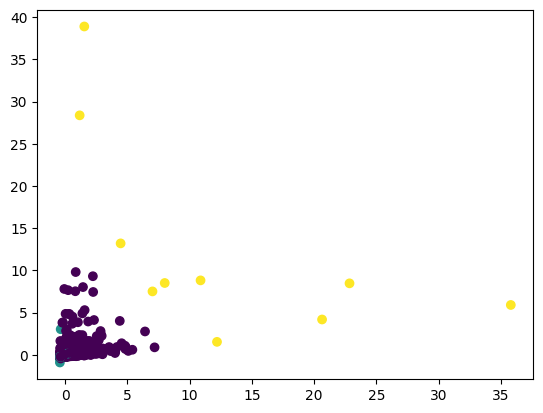

In [65]:
model = KMeans(n_clusters=3)
model.fit(sx)
print(model.labels_)
plt.scatter(sx[:,0],sx[:,2],c=model.labels_)
plt.show()

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
silhouette_score(sx,model.labels_)

0.585612104945189

In [68]:
x[:,0] = np.log1p(x[:,0])
x[:,1] = np.log1p(x[:,1])
x[:,2] = np.log1p(x[:,2])

<ipython-input-68-624de553f5c6>:3: RuntimeWarning: invalid value encountered in log1p
  x[:,2] = np.log1p(x[:,2])


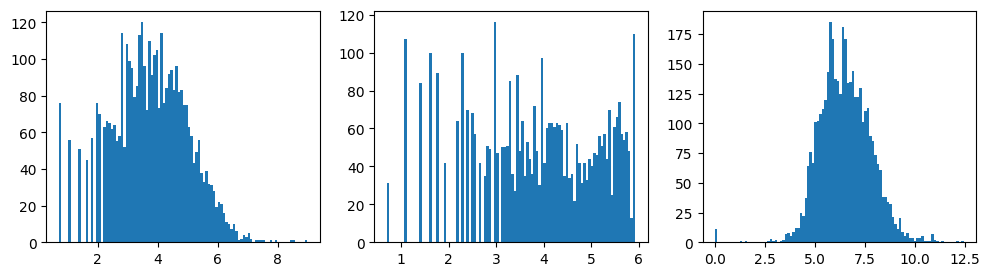

In [69]:
_,axes = plt.subplots(ncols=3,figsize=(12,3))
axes[0].hist(x[:,0],bins=100)
axes[1].hist(x[:,1],bins=100)
axes[2].hist(x[:,2],bins=100)
plt.show()

In [74]:
df = pd.DataFrame(x,columns=['a','b','c'])
df['c'] = df['c'].fillna(df['c'].min())
df['c'].info()
x = df.values

<class 'pandas.core.series.Series'>
RangeIndex: 3950 entries, 0 to 3949
Series name: c
Non-Null Count  Dtype  
--------------  -----  
3950 non-null   float64
dtypes: float64(1)
memory usage: 31.0 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 1 ... 0 1 0]


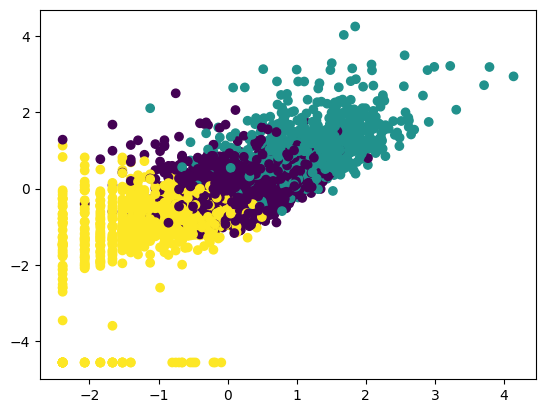

0.2960765725227897

In [75]:
ss = StandardScaler()
sx = ss.fit_transform(x)
model = KMeans(n_clusters=3)
model.fit(sx)
print(model.labels_)
plt.scatter(sx[:,0],sx[:,2],c=model.labels_)
plt.show()
silhouette_score(sx,model.labels_)